In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

In [2]:
import numpy as np
import torch
tkwargs = {"dtype": torch.double,
#            "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
           "device": torch.device("cpu")
          }

from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler
import matplotlib.pyplot as plt

import one_hot_BO_utils as oh
import MAB_BO_utils as mab

In [3]:
# global parameters

d = 5
m = 2*(d+1)
C = 5
BOUNDS = torch.tensor([[-10.0]*d,
                       [10.0]*d]).to(**tkwargs)
BOUNDS_ACQF = torch.tensor([[0.0]*C + [-10.0]*d,
                            [1.0]*C + [10.0]*d]).to(**tkwargs)

N_CANDIDATES = 1
N_TRIALS = 5
N_ITERS = 100
NU = 0.5

# for MAB-BO
N_THOMPSON_SAMPLES = 7000
SAMPLER = 'cholesky'

# for one-hot EI-BO
NUM_MC_SAMPLES = 256
qmc_sampler = SobolQMCNormalSampler(num_samples=NUM_MC_SAMPLES)

### MAB-BO

In [4]:
# BO LOOP

best_values_2 = torch.empty(N_TRIALS, N_ITERS + 1, **tkwargs)

for t in range(N_TRIALS):
    
    # generate starting dataset
    train_X = mab.generate_X(m, C, BOUNDS, seed=t).to(**tkwargs)
    train_y = mab.modified_neg_ackley(train_X).to(**tkwargs)
    best_values_2[t, 0] = train_y.max().item()

    
    for i in range(1, N_ITERS + 1):
        
        print(f"trial {t+1}/{N_TRIALS} | iteration {i}/{N_ITERS}")
    
        # normalize X 
        train_X_normalized = mab.normalize_with_bounds(train_X, BOUNDS)
#         # standardize y
#         standardizer = Standardize(1)
#         train_y_standardized = standardizer(train_y)[0]

        # initialize model
        models = mab.initialize_models(train_X_normalized, train_y, nu=NU, sampler=SAMPLER)
        
        # get candidates
        new_X = mab.get_candidates(models, d, N_CANDIDATES, N_THOMPSON_SAMPLES, sampler=SAMPLER)
        
        # denormalize candidates
        new_X = mab.denormalize_with_bounds(new_X, BOUNDS)
        
        # evaluate objective
        new_y = mab.modified_neg_ackley(new_X)
        
        # update train_X and train_y
        train_X = torch.cat([train_X, new_X], dim=0)
        train_y = torch.cat([train_y, new_y], dim=0)
        
        # update best values
        best = train_y.max().item()
        print(f"best = {best}")
        best_values_2[t, i] = best

trial 1/5 | iteration 1/100
picked category: 0 | sampled posterior value = -11.541379720340137
best = -11.754869915997466
trial 1/5 | iteration 2/100
picked category: 1 | sampled posterior value = -9.601664961151121
best = -11.754869915997466
trial 1/5 | iteration 3/100
picked category: 1 | sampled posterior value = -10.727123168246699
best = -11.754869915997466
trial 1/5 | iteration 4/100
picked category: 0 | sampled posterior value = -10.457544236436014
best = -11.754869915997466
trial 1/5 | iteration 5/100
picked category: 0 | sampled posterior value = -13.428792657881846
best = -11.754869915997466
trial 1/5 | iteration 6/100
picked category: 1 | sampled posterior value = -11.872341888906575
best = -11.754869915997466
trial 1/5 | iteration 7/100
picked category: 3 | sampled posterior value = -13.16747208135523
best = -11.754869915997466
trial 1/5 | iteration 8/100
picked category: 1 | sampled posterior value = -11.030673177010716
best = -11.754869915997466
trial 1/5 | iteration 9/10

picked category: 1 | sampled posterior value = -6.966896400482706
best = -4.490811403456796
trial 1/5 | iteration 69/100
picked category: 1 | sampled posterior value = -7.407950479824067
best = -4.490811403456796
trial 1/5 | iteration 70/100
picked category: 1 | sampled posterior value = -7.071644147887988
best = -4.490811403456796
trial 1/5 | iteration 71/100
picked category: 1 | sampled posterior value = -6.786467466758619
best = -4.490811403456796
trial 1/5 | iteration 72/100
picked category: 1 | sampled posterior value = -6.454648728715662
best = -4.490811403456796
trial 1/5 | iteration 73/100
picked category: 1 | sampled posterior value = -7.276295185415931
best = -4.490811403456796
trial 1/5 | iteration 74/100
picked category: 1 | sampled posterior value = -7.570337968080061
best = -4.481722830917889
trial 1/5 | iteration 75/100
picked category: 1 | sampled posterior value = -7.148232355241286
best = -4.481722830917889
trial 1/5 | iteration 76/100
picked category: 1 | sampled pos

picked category: 4 | sampled posterior value = -12.731472931490577
best = -8.402830567701576
trial 2/5 | iteration 37/100
picked category: 0 | sampled posterior value = -9.234869994750936
best = -8.402830567701576
trial 2/5 | iteration 38/100
picked category: 3 | sampled posterior value = -11.512215597630082
best = -8.402830567701576
trial 2/5 | iteration 39/100
picked category: 0 | sampled posterior value = -9.456112387233377
best = -8.402830567701576
trial 2/5 | iteration 40/100
picked category: 3 | sampled posterior value = -13.798082666150902
best = -8.402830567701576
trial 2/5 | iteration 41/100
picked category: 0 | sampled posterior value = -11.376862863391992
best = -8.402830567701576
trial 2/5 | iteration 42/100
picked category: 2 | sampled posterior value = -9.107125642088352
best = -8.402830567701576
trial 2/5 | iteration 43/100
picked category: 0 | sampled posterior value = -9.502818422149577
best = -8.402830567701576
trial 2/5 | iteration 44/100
picked category: 0 | sampled

picked category: 0 | sampled posterior value = -10.246559130839575
best = -7.791022285866783
trial 3/5 | iteration 5/100
picked category: 3 | sampled posterior value = -11.6116336922856
best = -7.791022285866783
trial 3/5 | iteration 6/100
picked category: 0 | sampled posterior value = -10.562347058310433
best = -7.791022285866783
trial 3/5 | iteration 7/100
picked category: 0 | sampled posterior value = -11.330553602357305
best = -7.791022285866783
trial 3/5 | iteration 8/100
picked category: 2 | sampled posterior value = -9.065651287945261
best = -7.791022285866783
trial 3/5 | iteration 9/100
picked category: 1 | sampled posterior value = -13.637901402704188
best = -7.791022285866783
trial 3/5 | iteration 10/100
picked category: 0 | sampled posterior value = -10.751992374222096
best = -7.791022285866783
trial 3/5 | iteration 11/100
picked category: 2 | sampled posterior value = -12.434231954616575
best = -7.791022285866783
trial 3/5 | iteration 12/100
picked category: 3 | sampled pos

picked category: 2 | sampled posterior value = -6.193404971879062
best = -4.18167318253958
trial 3/5 | iteration 73/100
picked category: 2 | sampled posterior value = -6.626780597392164
best = -4.18167318253958
trial 3/5 | iteration 74/100
picked category: 2 | sampled posterior value = -5.675872047320217
best = -4.18167318253958
trial 3/5 | iteration 75/100
picked category: 2 | sampled posterior value = -7.161690538226488
best = -4.18167318253958
trial 3/5 | iteration 76/100
picked category: 2 | sampled posterior value = -7.342584161058559
best = -4.18167318253958
trial 3/5 | iteration 77/100
picked category: 2 | sampled posterior value = -6.048776747135937
best = -4.18167318253958
trial 3/5 | iteration 78/100
picked category: 2 | sampled posterior value = -6.622574354627611
best = -4.18167318253958
trial 3/5 | iteration 79/100
picked category: 2 | sampled posterior value = -6.428753570989628
best = -4.18167318253958
trial 3/5 | iteration 80/100
picked category: 2 | sampled posterior v

picked category: 1 | sampled posterior value = -8.335539983714842
best = -8.549344568513723
trial 4/5 | iteration 41/100
picked category: 1 | sampled posterior value = -11.63381605737738
best = -8.549344568513723
trial 4/5 | iteration 42/100
picked category: 1 | sampled posterior value = -12.071415415784399
best = -8.549344568513723
trial 4/5 | iteration 43/100
picked category: 0 | sampled posterior value = -10.781659040373867
best = -8.549344568513723
trial 4/5 | iteration 44/100
picked category: 4 | sampled posterior value = -12.470727703591022
best = -8.549344568513723
trial 4/5 | iteration 45/100
picked category: 2 | sampled posterior value = -10.02212046354077
best = -8.549344568513723
trial 4/5 | iteration 46/100
picked category: 1 | sampled posterior value = -11.329854168236766
best = -8.549344568513723
trial 4/5 | iteration 47/100
picked category: 0 | sampled posterior value = -8.310206309650294
best = -8.549344568513723
trial 4/5 | iteration 48/100
picked category: 2 | sampled

picked category: 1 | sampled posterior value = -10.39473769008235
best = -9.343653786406414
trial 5/5 | iteration 9/100
picked category: 0 | sampled posterior value = -11.250565399517033
best = -9.343653786406414
trial 5/5 | iteration 10/100
picked category: 0 | sampled posterior value = -11.556678286214146
best = -9.343653786406414
trial 5/5 | iteration 11/100
picked category: 1 | sampled posterior value = -11.32711264479946
best = -9.343653786406414
trial 5/5 | iteration 12/100
picked category: 1 | sampled posterior value = -11.194566948393462
best = -9.343653786406414
trial 5/5 | iteration 13/100
picked category: 4 | sampled posterior value = -12.023404887669333
best = -9.343653786406414
trial 5/5 | iteration 14/100
picked category: 4 | sampled posterior value = -7.777611522579505
best = -9.343653786406414
trial 5/5 | iteration 15/100
picked category: 0 | sampled posterior value = -7.905773667777285
best = -9.343653786406414
trial 5/5 | iteration 16/100
picked category: 3 | sampled 

picked category: 1 | sampled posterior value = -8.585275061218786
best = -8.626483064170937
trial 5/5 | iteration 77/100
picked category: 3 | sampled posterior value = -11.837870944873586
best = -8.626483064170937
trial 5/5 | iteration 78/100
picked category: 1 | sampled posterior value = -8.788258280890393
best = -8.626483064170937
trial 5/5 | iteration 79/100
picked category: 1 | sampled posterior value = -8.764033451661422
best = -8.626483064170937
trial 5/5 | iteration 80/100
picked category: 4 | sampled posterior value = -10.69560754202154
best = -8.626483064170937
trial 5/5 | iteration 81/100
picked category: 1 | sampled posterior value = -7.002007839103893
best = -5.5578272372335285
trial 5/5 | iteration 82/100
picked category: 1 | sampled posterior value = -7.98202563977779
best = -5.5578272372335285
trial 5/5 | iteration 83/100
picked category: 1 | sampled posterior value = -5.726279885706581
best = -5.5578272372335285
trial 5/5 | iteration 84/100
picked category: 1 | sampled 

### One-hot

In [5]:
# BO LOOP

best_values = torch.empty(N_TRIALS, N_ITERS + 1, **tkwargs)

for t in range(N_TRIALS):
    
    # generate starting dataset
    train_X = oh.generate_X(m, C, BOUNDS, seed=t)
    train_y = oh.modified_neg_ackley(train_X, C)
    best_values[t, 0] = train_y.max().item()

    
    for i in range(1, N_ITERS + 1):
        
        print(f"trial {t+1}/{N_TRIALS} | iteration {i}/{N_ITERS}")
        
        new_X = []
        
        for j in range(N_CANDIDATES):
            
            # set X_pending
            if len(new_X) > 0:
                X_pending = torch.cat(new_X, dim=0)
            else:
                X_pending = None
        
            # normalize X
            train_X_normalized = oh.normalize_with_bounds(train_X, C, BOUNDS)
        
            # initialize model
            model = oh.initialize_models(train_X_normalized, train_y, nu=NU)
            
            # define acqf
            acqf = qExpectedImprovement(model=model, 
                                        best_f=train_y.max(),
                                        sampler=qmc_sampler,
                                        X_pending=X_pending)
        
            # get candidates
            X_picked = oh.get_candidate(acqf, BOUNDS_ACQF, C)
            new_X.append(X_picked)
            
        new_X = torch.cat(new_X, dim=0).to(**tkwargs)
        
        # denormalize candidates
        new_X = oh.denormalize_with_bounds(new_X, C, BOUNDS)
        
        # evaluate objective
        new_y = oh.modified_neg_ackley(new_X, C).to(**tkwargs)
        
        # update train_X and train_y
        train_X = torch.cat([train_X, new_X], dim=0)
        train_y = torch.cat([train_y, new_y], dim=0)
        
        # update best values
        best = train_y.max().item()
        print(f"best = {best}")
        best_values[t, i] = best

trial 1/5 | iteration 1/100
best = -11.754869915997466
trial 1/5 | iteration 2/100
best = -11.754869915997466
trial 1/5 | iteration 3/100
best = -11.754869915997466
trial 1/5 | iteration 4/100
best = -11.754869915997466
trial 1/5 | iteration 5/100
best = -11.754869915997466
trial 1/5 | iteration 6/100
best = -11.754869915997466
trial 1/5 | iteration 7/100
best = -11.754869915997466
trial 1/5 | iteration 8/100
best = -11.754869915997466
trial 1/5 | iteration 9/100
best = -11.754869915997466
trial 1/5 | iteration 10/100
best = -11.754869915997466
trial 1/5 | iteration 11/100
best = -11.754869915997466
trial 1/5 | iteration 12/100
best = -11.754869915997466
trial 1/5 | iteration 13/100
best = -11.754869915997466
trial 1/5 | iteration 14/100
best = -11.754869915997466
trial 1/5 | iteration 15/100
best = -11.754869915997466
trial 1/5 | iteration 16/100
best = -11.754869915997466
trial 1/5 | iteration 17/100
best = -11.754869915997466
trial 1/5 | iteration 18/100
best = -11.754869915997466
t

best = -5.7032179837574475
trial 2/5 | iteration 49/100
best = -5.7032179837574475
trial 2/5 | iteration 50/100
best = -5.7032179837574475
trial 2/5 | iteration 51/100
best = -5.7032179837574475
trial 2/5 | iteration 52/100
best = -5.7032179837574475
trial 2/5 | iteration 53/100
best = -5.7032179837574475
trial 2/5 | iteration 54/100
best = -5.7032179837574475
trial 2/5 | iteration 55/100
best = -5.7032179837574475
trial 2/5 | iteration 56/100
best = -5.7032179837574475
trial 2/5 | iteration 57/100
best = -5.7032179837574475
trial 2/5 | iteration 58/100
best = -5.7032179837574475
trial 2/5 | iteration 59/100
best = -5.7032179837574475
trial 2/5 | iteration 60/100
best = -5.7032179837574475
trial 2/5 | iteration 61/100
best = -5.7032179837574475
trial 2/5 | iteration 62/100
best = -5.7032179837574475
trial 2/5 | iteration 63/100
best = -5.7032179837574475
trial 2/5 | iteration 64/100
best = -5.7032179837574475
trial 2/5 | iteration 65/100
best = -5.7032179837574475
trial 2/5 | iteration

best = -7.791022285866783
trial 3/5 | iteration 98/100
best = -7.791022285866783
trial 3/5 | iteration 99/100
best = -7.791022285866783
trial 3/5 | iteration 100/100
best = -7.791022285866783
trial 4/5 | iteration 1/100
best = -7.784836777716153
trial 4/5 | iteration 2/100
best = -7.784836777716153
trial 4/5 | iteration 3/100
best = -7.784836777716153
trial 4/5 | iteration 4/100
best = -7.784836777716153
trial 4/5 | iteration 5/100
best = -7.784836777716153
trial 4/5 | iteration 6/100
best = -7.784836777716153
trial 4/5 | iteration 7/100
best = -7.784836777716153
trial 4/5 | iteration 8/100
best = -7.784836777716153
trial 4/5 | iteration 9/100
best = -7.784836777716153
trial 4/5 | iteration 10/100
best = -7.784836777716153
trial 4/5 | iteration 11/100
best = -7.784836777716153
trial 4/5 | iteration 12/100
best = -7.784836777716153
trial 4/5 | iteration 13/100
best = -7.784836777716153
trial 4/5 | iteration 14/100
best = -7.784836777716153
trial 4/5 | iteration 15/100
best = -7.78483677

best = -9.343653786406414
trial 5/5 | iteration 48/100
best = -9.343653786406414
trial 5/5 | iteration 49/100
best = -9.343653786406414
trial 5/5 | iteration 50/100
best = -9.343653786406414
trial 5/5 | iteration 51/100
best = -9.343653786406414
trial 5/5 | iteration 52/100
best = -9.343653786406414
trial 5/5 | iteration 53/100
best = -9.343653786406414
trial 5/5 | iteration 54/100
best = -9.343653786406414
trial 5/5 | iteration 55/100
best = -9.343653786406414
trial 5/5 | iteration 56/100
best = -9.343653786406414
trial 5/5 | iteration 57/100
best = -9.343653786406414
trial 5/5 | iteration 58/100
best = -9.343653786406414
trial 5/5 | iteration 59/100
best = -9.343653786406414
trial 5/5 | iteration 60/100
best = -9.343653786406414
trial 5/5 | iteration 61/100
best = -9.343653786406414
trial 5/5 | iteration 62/100
best = -9.343653786406414
trial 5/5 | iteration 63/100
best = -9.343653786406414
trial 5/5 | iteration 64/100
best = -9.343653786406414
trial 5/5 | iteration 65/100
best = -9.

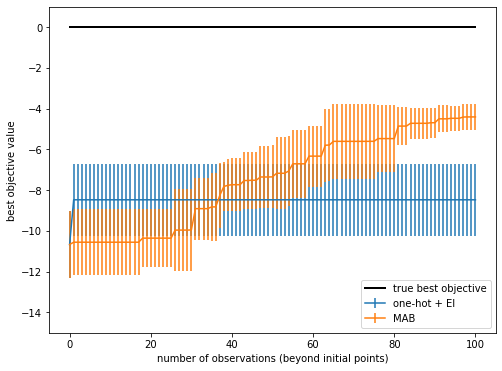

In [7]:
# plot results

def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(N_TRIALS)


GLOBAL_MAXIMUM = 0.0


obs = np.arange(N_ITERS + 1) * N_CANDIDATES
y1 = np.asarray(best_values.to('cpu'))
y2 = np.asarray(best_values_2.to('cpu'))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.errorbar(obs, y1.mean(axis=0), yerr=ci(y1), label="one-hot + EI", linewidth=1.5)
ax.errorbar(obs, y2.mean(axis=0), yerr=ci(y2), label="MAB", linewidth=1.5)
plt.plot([0, N_ITERS * N_CANDIDATES], [GLOBAL_MAXIMUM] * 2, 'k', label="true best objective", linewidth=2)
ax.set_ylim(bottom=-15, top=1)
ax.set(xlabel='number of observations (beyond initial points)', ylabel='best objective value')
ax.legend(loc="lower right")